In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os
import shutil
import datetime
%matplotlib notebook

## CPI data of Northeast Urban from 1997 to 2017

In [4]:
# if the directory exists, remove it first
!rm -rf raw_data/

In [5]:
# data in my github, downloaded from https://www.bls.gov/cpi/regional-resources.htm

!git clone https://github.com/rfcoffee/Buffalo-Niagara-Employment/ raw_data
os.chdir('./raw_data')
!rm *.csv

Cloning into 'raw_data'...
remote: Counting objects: 20, done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
Checking connectivity... done.


<IPython.core.display.Javascript object>


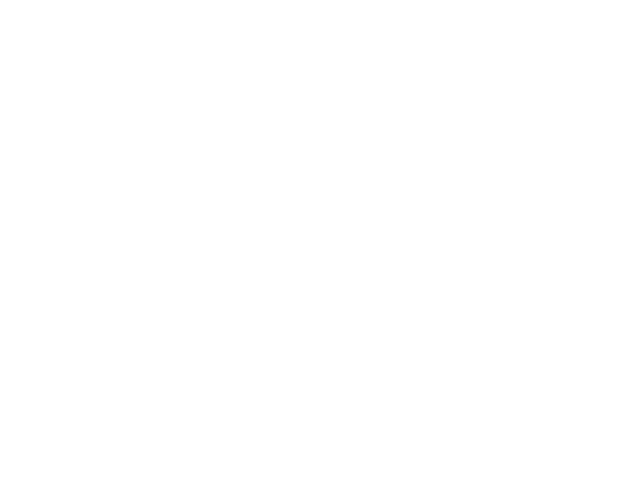

In [6]:
# read cpi data to dataframe, clean, and put to CSV
cpi = pd.read_excel('cpi_northeast.xlsx', header=11)
cpi_new = pd.DataFrame()
cpi_new['Time'] = list(map(lambda x: datetime.datetime(x, 5, 1, 0, 0), cpi['Year'])) \
+ list(map(lambda x: datetime.datetime(x, 11, 1, 0, 0), cpi['Year']))

cpi_new['Cpi'] = cpi['HALF1'].append(cpi['HALF2']).values
cpi_new.to_csv('cpi_northeast.csv')
plt.plot(cpi_new['Time'], cpi_new['Cpi'], 'o')

## Occupation data download and cleaning

In [7]:
# file name: oes (Occupational Employment Statistics), m/n (May/November), 17 (2017), ma (Metropolitan and nonmetropolitana area)
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm17ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm16ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm15ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm14ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm13ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm12ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm11ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm10ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm09ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm08ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm07ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm06ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm05ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesn04ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm04ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesn03ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oesm03ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oes02ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oes01ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oes00ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oes99ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oes98ma.zip
!wget -q --show-progress https://www.bls.gov/oes/special.requests/oes97ma.zip

oesm17ma.zip        100%[=====================>]  33.59M  16.0MB/s   in 2.1s   
oesm16ma.zip        100%[=====================>]  34.05M  14.1MB/s   in 2.4s   
oesm15ma.zip        100%[=====================>]  34.02M   148MB/s   in 0.2s   
oesm14ma.zip        100%[=====================>]  33.81M   158MB/s   in 0.2s   
oesm13ma.zip        100%[=====================>]  20.92M  --.-KB/s   in 0.1s   
oesm12ma.zip        100%[=====================>]  20.94M  --.-KB/s   in 0.1s   
oesm11ma.zip        100%[=====================>]  20.05M  --.-KB/s   in 0.1s   
oesm10ma.zip        100%[=====================>]  20.69M  --.-KB/s   in 0.1s   
oesm09ma.zip        100%[=====================>]  19.85M  --.-KB/s   in 0.1s   
oesm08ma.zip        100%[=====================>]  18.54M  --.-KB/s   in 0.1s   
oesm07ma.zip        100%[=====================>]  18.57M   121MB/s   in 0.2s   
oesm06ma.zip        100%[=====================>]  17.74M  --.-KB/s   in 0.1s   
oesm05ma.zip        100%[===============

In [8]:
# unzip
! for f in *.zip; do unzip -tq $f; unzip -oq $f; done

No errors detected in compressed data of oes00ma.zip.
No errors detected in compressed data of oes01ma.zip.
No errors detected in compressed data of oes02ma.zip.
No errors detected in compressed data of oes97ma.zip.
No errors detected in compressed data of oes98ma.zip.
No errors detected in compressed data of oes99ma.zip.
No errors detected in compressed data of oesm03ma.zip.
No errors detected in compressed data of oesm04ma.zip.
No errors detected in compressed data of oesm05ma.zip.
No errors detected in compressed data of oesm06ma.zip.
No errors detected in compressed data of oesm07ma.zip.
No errors detected in compressed data of oesm08ma.zip.
No errors detected in compressed data of oesm09ma.zip.
No errors detected in compressed data of oesm10ma.zip.
No errors detected in compressed data of oesm11ma.zip.
No errors detected in compressed data of oesm12ma.zip.
No errors detected in compressed data of oesm13ma.zip.
No errors detected in compressed data of oesm14ma.zip.
No errors detect

In [9]:
# remove zip files
! rm *.zip

In [10]:
# flatten any subdirectory
for file in os.listdir():
    if os.path.isdir(file):
        for subfile in os.listdir(file):
            os.rename(os.getcwd()+'/'+file+'/'+subfile, os.getcwd()+'/'+subfile)
            #os.rename(os.path.abspath(subfile), os.path.abspath(subfile).replace(file+'/' ,''))

In [11]:
# Execptions: 2009 data files are not properly named (manually found)
os.rename('MSA_dl_1.xls', 'MSA_M2009_dl_1.xls')
os.rename('MSA_dl_2.xls', 'MSA_M2009_dl_2.xls')
os.rename('MSA_dl_3.xls', 'MSA_M2009_dl_3.xls')

In [12]:
# put excel files to a dictionary, whose key is file name and value is dataframe
# we use dictionary rather than list, because some files don't have 'year' column --> use dict to get year from file name
df = {}
i = 0
for file in os.listdir():
    if '.xls' in file: 
        df[file.replace('.xls', '')] = pd.read_excel(file);
        i = i+1
    elif '.xlsx' in file:
        df[file.replace('.xlsx', '')] = pd.read_excel(file);
        i = i+1
print('total number of data files: {:}'.format(i))

total number of data files: 85


In [13]:
# check if a list is the correct header
def header_check(alist):
    return (('PRIM_STATE' in alist) | ('prim_state' in alist)) \
    & (('AREA' in alist) | ('area' in alist)) \
    & (('AREA_NAME' in alist) | ('area_name' in alist))

In [14]:
# keep data with a correct header
df_data = {}
for key in df.keys():
    if header_check(df[key].columns.values):
        df_data[key] = df[key]
    else:
        for i in range(len(df[key].index)):
            if header_check(df[key].iloc[i].values):
                temp_df = df[key].copy()
                new_header = temp_df.iloc[i]
                temp_df = temp_df.iloc[(i+1):]
                temp_df.columns = new_header
                df_data[key] = temp_df

In [15]:
# write all headers in the lower case
for key in df_data.keys():
    df_data[key].columns = list(map(str.lower, df_data[key].columns))

In [16]:
# only keep the dataframe parts containing Buffalo region
df_buffalo = {}
for key in df_data.keys():
    temp = df_data[key].copy()
    if len(temp[(temp['prim_state']=='NY') & (list(map(lambda x: 'Buffalo' in x, temp['area_name'])))].index) > 0:
        df_buffalo[key] = temp[(temp['prim_state']=='NY') & (list(map(lambda x: 'Buffalo' in x, temp['area_name'])))]

In [17]:
# change the keys to timestamps
yr_short = np.array(['97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', \
                     '16', '17'])
yr_full = np.array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                    '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
def string_to_time(astring):
    # extract month   (assume May if string not containing 'november')
    if astring.find('november') !=-1:
        month = '11'
    else:
        month = '5'
    # extract year
    search_yr_full = yr_full[np.array(list(map(astring.find, yr_full))) !=-1]
    if len(search_yr_full) !=0:
        year = search_yr_full[0]
    else:
        search_yr_short = yr_short[np.array(list(map(astring.find, yr_short))) !=-1]
        if len(search_yr_short) !=0:
            year = search_yr_short[0]
        else:
            print('error: year of ' + astring + ' not found!')
    if len(year) == 4:
        return datetime.datetime.strptime(year+month, '%Y%m')
    elif len(year) == 2:
        return datetime.datetime.strptime(year+month, '%y%m')
    else:
        print('error: string_to_time(' + astring + '), length of year is wrong!')

In [18]:
# convert keys to datastamps
old_keys = tuple(df_buffalo.keys())
for key in old_keys:
    df_buffalo[string_to_time(key)] = df_buffalo.pop(key)

## Further cleaning

In [54]:
# Exception
df_buffalo[datetime.datetime(2000, 5, 1,0,0)].rename(columns={'occ_titl': 'occ_title'}, inplace=True)

In [55]:
# combine data of different dates
df_occ = pd.DataFrame()
for key in df_buffalo.keys():
    if 'group' in df_buffalo[key].columns:
        temp = df_buffalo[key][df_buffalo[key]['group'] == 'major'].copy()
    else:
        temp = df_buffalo[key][df_buffalo[key]['occ_group'] == 'major'].copy()
    temp = temp[['occ_title', 'tot_emp', 'h_mean']]
    temp['occ_title'] = list(map(lambda x: min(x[0: x.find(' occupations')], x[0: x.find(' Occupations')]).lower(), temp['occ_title']))
    temp['date'] = key
    df_occ = df_occ.append(temp)

In [60]:
# uniformize some occupation namings
df_emp = df_occ.pivot_table(values='tot_emp', index='date', columns='occ_title', aggfunc='first')
df_hmean = df_occ.pivot_table(values='h_mean', index='date', columns='occ_title', aggfunc='first')

for index in df_emp.index:
    if index < datetime.datetime(2010,1,1,0,0):
        df_emp.loc[index]['community and social service'] = df_emp.loc[index]['community and social services']
        df_hmean.loc[index]['community and social service'] = df_hmean.loc[index]['community and social services']
    if (index < datetime.datetime(2010,1,1,0,0)) & (index > datetime.datetime(2008,1,1,0,0)):
        df_emp.loc[index]['computer and mathematical'] = df_emp.loc[index]['computer and mathematical science']
        df_hmean.loc[index]['computer and mathematical'] = df_hmean.loc[index]['computer and mathematical science']
    if index == datetime.datetime(2009,5,1,0,0):
        df_emp.loc[index]['healthcare practitioners and technical'] = df_emp.loc[index]['healthcare practitioner and technical']
        df_hmean.loc[index]['healthcare practitioners and technical'] = df_hmean.loc[index]['healthcare practitioner and technical']
df_emp.drop(labels=['all','community and social services', 'computer and mathematical science', 'healthcare practitioner and technical'],\
          axis=1, inplace=True)
df_hmean.drop(labels=['all','community and social services', 'computer and mathematical science', 'healthcare practitioner and technical'],\
          axis=1, inplace=True)

In [61]:
# tackle '*' cells in h_mean
df_hmean = df_hmean.replace('*', np.NaN)
df_hmean.fillna(method='ffill');

In [62]:
# change object to numerical values
df_emp = df_emp.applymap(float);
df_hmean = df_hmean.applymap(float);

In [63]:
# save emp_tot time series, and h_mean time series, to two CSV files
df_emp.to_csv('emp_tot.csv')
df_hmean.to_csv('h_mean.csv')

## Question to be addressed: 
over the 9 years, which occupation is earning more? Are people aggregate into that job?